# **Introducción y Aspectos Teóricos**


**Abstracto:** Se desea realizar un estudio en el cual se evalue la relación de las variables ganancia, inversión y género con el puntaje obtenido de cada una de las películas. Se podria creer que al realizar una inversión, estaría atada a la calidad de la producción, por lo que tendría que generar una ganancia acorde con lo invertido. En el mundo de la producción de películas esta situación puede ser distinta, ya que está sujeto a más factores de consumo por parte de los espectadores. Sin embargo, todos estos factores pueden resumirse o generalizarse por medio del factor "score". A continuación representaremos estas relaciones con algunos gráficos para analizar el caso.


Se espera con este análisis encontrar los mejores contratos posibles con los productores y futuros clientes de Strawberry y que obtengan excelentes puntaciones sin necesidad de generar tanta inversión por parte de los clientes ni tanto análisis por parte de los sectores de la empresa para llevar a cabo estos contratos. Esta investigación y análisis está orientada al sector de gerencia de Estrategias y Operaciones de la empresa, para la toma de decisiones.


Objetivo principal: Predecir cuáles futuros contratos tendrán éxito o no en la plataforma Strawberry.


Objetivos secundarios:

1- ¿La inversión y ganancia de las películas emitidas está relacionada con la puntuación obtenida?

2- ¿El género influye en la apreciación/valoración de las películas por parte de los consumidores?

3- ¿Existen otros factores predominantes a la hora de calificar películas por parte de los consumidores?


**Problema Comercial:** Entendemos que las producciones cinematográficas deben cumplir cierta expectativa por parte de sus consumidores y que existen criterios a tener en cuenta para que ésta pueda tener éxito en su mercado al ser consumida. Por parte del sector de Finanzas, indican que mientras mayor sea la inversión realizada en la producción de las películas, mayor será la ganancia que traerá la misma. Incluso del sector de Marketing apoyan tomar decisiones con esa base. Sin embargo, al analizar los datos de la empresa, y de las competencias en general, notamos que este patrón no se cumple a lo largo del tiempo. Hay películas que pueden tener una inversión enorme y no haber destacado entre los consumidores. Por esto evaluaremos si este patron tiene relevancia y ver si encontramos nuevos factores a tener en cuenta para cumplir dichos criterios.


**Objetivo:** predecir cuáles contratos con clientes de Strawberry tendrán éxito con el score y ganancia (tanto para los productores como para la empresa) en futuros estrenos de la plataforma. Tomaremos las variables score, budget_x y revenue para analizar cuáles han sido los casos destacados de la empresa en que se haya recibido una ganancia aceptable (un poco más del doble de inversión como mínimo) y con una producción valorada en términos estándar (desde 60/100 en adelante). Una vez realizado el análisis se creará una variable que determine si la producción se encuentra en los términos adecuados para llevar a cabo un contrato con la empresa y generar la ganancia y puntuación aceptadas. Tendremos que ajustar el KPI orientado al mejor modelo para obtener la mejor predicción del target "Calificada", que se basa en el criterio mencionado anteriormente.


**Contexto Analítico:** gracias al equipo de DATA se consiguió una base de datos que engloba la información de todas las películas que se han transmitido en TV, plataformas y cine, con el fin de analizarlas y poder llegar a conclusiones lógicas y predictivas, utilizando modelos supervisados de clasificación de diferentes clases. Así como también poner en práctica diferentes tipos de análisis de los datos brindados para responder a las interrogantes del presente proyecto.


**Contexto Comercial:** trabaja para la plataforma mas cotizada del momento, Streamberry. Actualmente hay muchos productores esperando a firmar contratos o acuerdos con nosotros para estrenar sus películas en nuestra plataforma, todas de diferentes categorías. Sin embargo, por parte del sector de gerencia, no están seguros de tomar cualquier cliente sin tener en cuenta los factores necesarios que expliquen si es una buena o mala decisión; es decir, necesitan tener más claro si hay factores que no están teniendo en cuenta a la hora de aceptar o rechazar contratos con dichos clientes para obtener la mejor ganancia posible, acorde a la inversión realizada, tanto por parte de la producción, como de la empresa.

In [ ]:
#@title Importamos librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import requests
import json
import os
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler

Empezamos todo el proceso llamando a las librerias que utilizaremos para los analisis y procesos del proyecto.

In [ ]:
#@title Database IMDB y especificaciones
archivo = 'https://drive.google.com/file/d/197jVhDvOKyraDMQskeEwpg_dOXw5qwJq/view?usp=drive_link'
url = 'https://drive.google.com/uc?id=' + archivo.split('/')[-2]
df_imdb = pd.read_csv(url) #Convertimos la base de datos en un DataFrame
df_imdb.head() #Observamos como se visualizan los datos originales

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


1. name: nombre de la película
2. date_x: fecha de estreno (DD-MM-YY)
3. score: puntuación de la película (del 1 al 100)
4. genre: género de la película
5. overview: descripción general o sinopsis
6. crew: elenco de actores/actrices
7. orig_title: título original de la película
8. status: estado actual (producción, liberada, etc)
9. orig_lang: idioma original de la película
10. budget_x: inversión realizada (USD)
11. revenue: ganancia obtenida (USD)
12. country: país de producción

Estos serían los campos que integran la base de datos adquirida para realizar el proyecto. Màs adelante podremos manipular o transformar según lo requiera el proyecto.

#Data Wrangling

In [ ]:
#@title Conocemos las dimensiones del dataset
df_imdb.shape

(10178, 12)

Tenemos una base de datos sin limpieza y modificaciones de 10178 filas y 12 columnas en total. Tendremos que manipular los datos para afinarlos y que los modelos de predicción puedan arrojar buenos resultados.

In [ ]:
#@title Exploración de datos
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


Como apreciamos en la lista de información, tenemos un total de 10178 filas. Además, "date_x" debería ser un dato en formato date pero nos figura como object, por lo que tendremos que transformar este dato a futuro para poder manipularlo. En cuanto a las columnas "genre" y "crew" observamos que tienen un pequeño porcentaje de nulos (menos del 1% en cada caso).

In [ ]:
#@title Borrado de duplicados
print(df_imdb.shape)
df_imdb = df_imdb.drop_duplicates()
print(df_imdb.shape)

(10178, 12)
(10178, 12)


No existian datos duplicados, pero igual se realiza para evitar futuros inconvenientes.

In [ ]:
#@title Analisis de nulos
pd.set_option('display.max_rows', None)
analisis_nulos =(df_imdb.isnull().sum()/df_imdb.shape[0])*100
analisis_nulos = analisis_nulos.sort_values(ascending = False)
analisis_nulos= analisis_nulos[analisis_nulos > 0]
analisis_nulos

genre    0.835135
crew     0.550206
dtype: float64

Tendremos que trabajar a futuro con esta cantidad de datos que, aunque no va a alterar significativamente los resultados, si necesitamos trabajarlos para que el proyecto arroje las predicciones mas precisas posibles.

<Axes: >

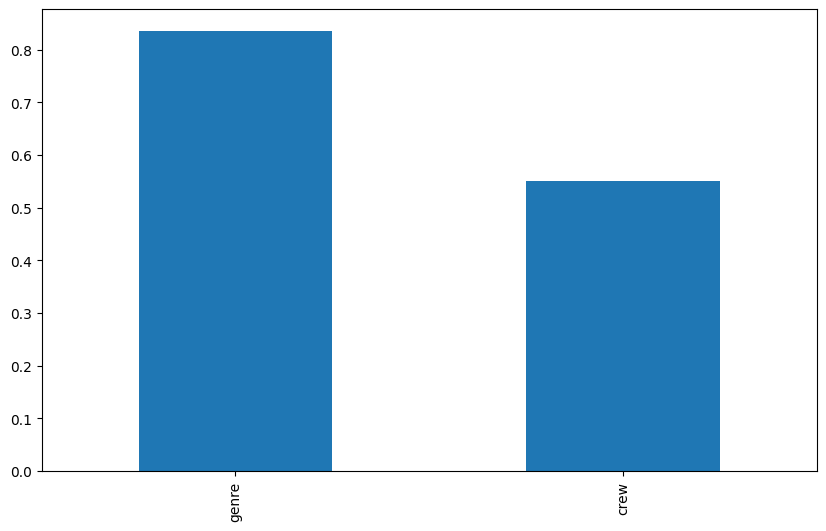

In [ ]:
#@title Gráfico de barras de porcentaje de nulos
plt.figure(figsize=(10,6))
analisis_nulos.plot(kind='bar')

In [ ]:
#@title Instalamos missingno para visualizar en otra escala a los datos nulos
!pip install missingno

<Axes: >

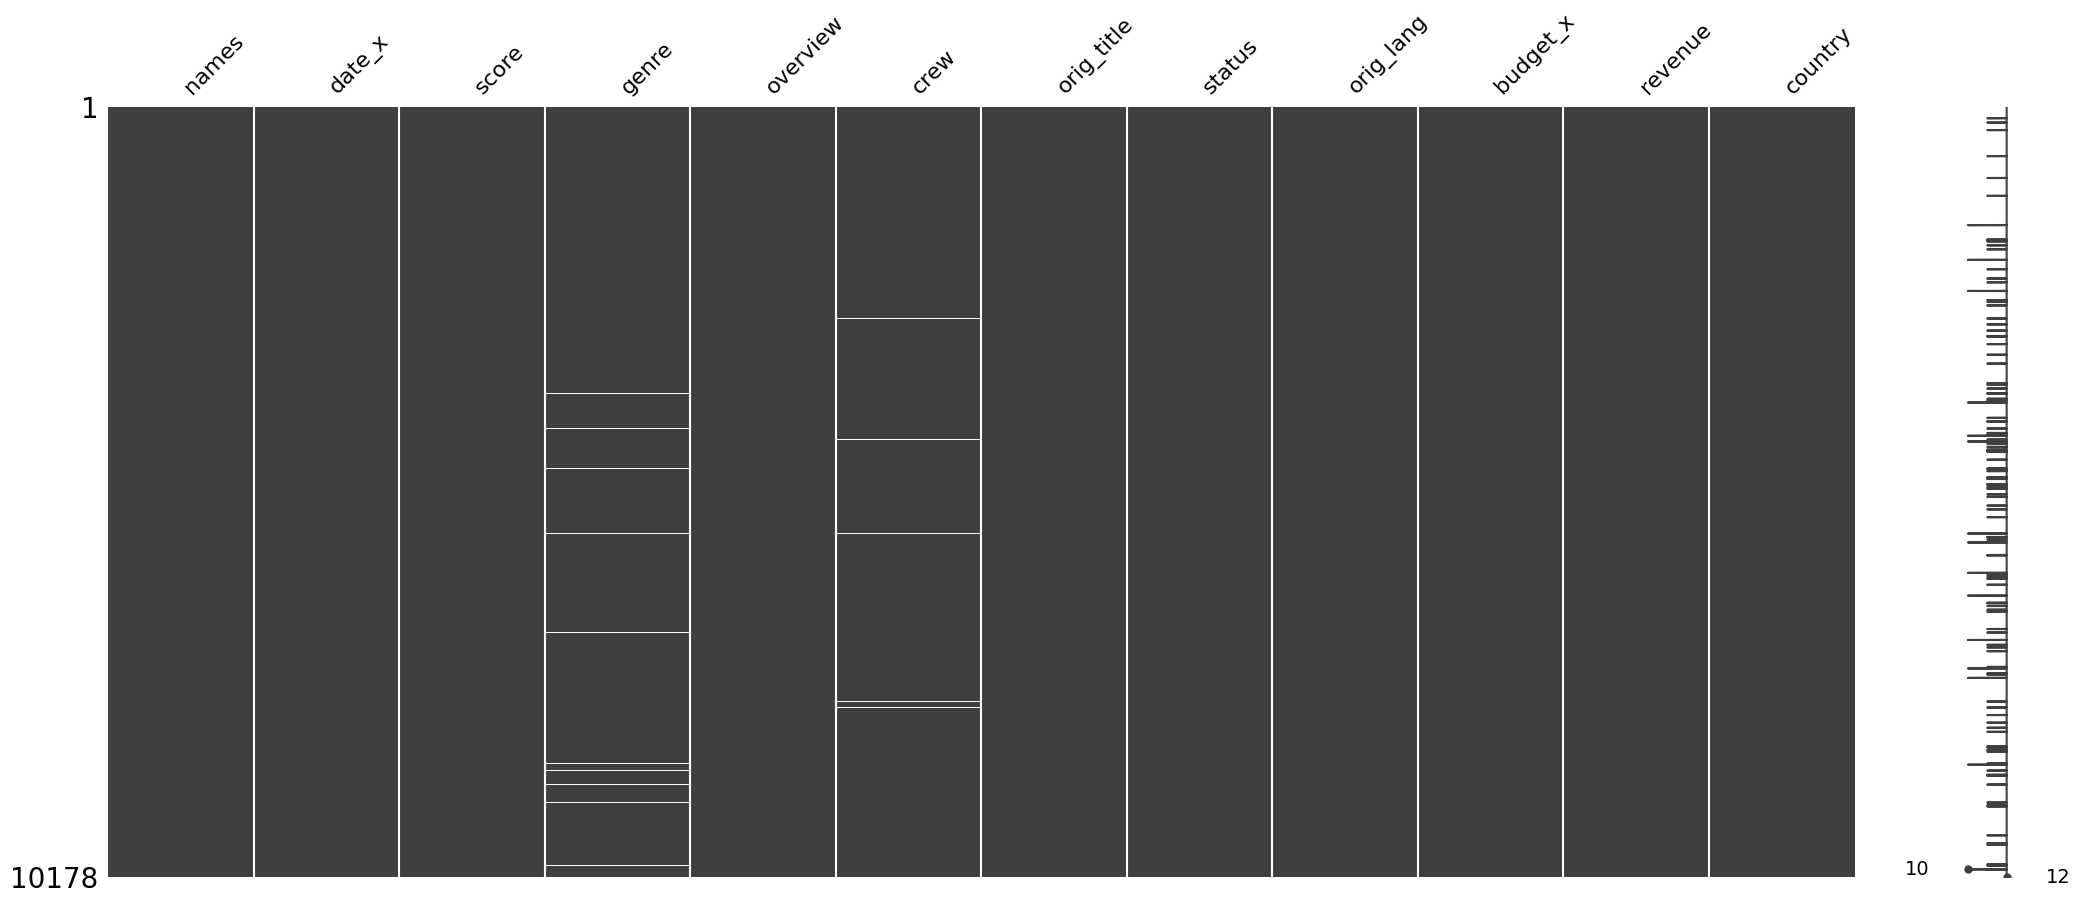

In [ ]:
#@title Visualizamos los datos nulos
msno.matrix(df_imdb)

In [ ]:
# Usando df_imdb.crew.value_counts() notamos que son muchos datos compuestos y nada específicos que convenga evaluar, por lo que tomamos la decision de armar una columna aparte donde sólo figuren el actor/actriz principal de cada película, llamada "primary_crew" y borrar esta columna.
# Será importante para el modelo conocer al menos el actor/actriz principal para las predicciones.

In [ ]:
# Usando el comando df_imdb.genre.value_counts() notamos que son demasiados datos y de forma desordenada, por lo que tomaremos la decision de no borrar, pero crearemos la columna "primary_genre" donde sólo figurara el género principal para análisis de gráficos.
# Vamos a utilizar 'primary_genre' para el EDA y 'genre' para las predicciones.

In [ ]:
#@title Transformaciones de Datos
separados_1 = df_imdb["genre"].str.split(",", n=1, expand=True) #Creamos la columna primary_genre
df_imdb["primary_genre"] = separados_1[0]

df_imdb['score'] = df_imdb['score'].round(0).astype(int) #Transformamos la columna score en int para no tener inconvenientes con futuros procesos

separados_2 = df_imdb["crew"].str.split(",", n=1, expand=True) #Creamos la columna primary_crew
df_imdb["primary_crew"] = separados_2[0]

df_imdb['date_x'] = pd.to_datetime(df_imdb['date_x']) #Agregamos las columnas Month y Year para poder analizar los datos de forma más organizada a futuro
df_imdb['Month'] = df_imdb['date_x'].dt.month
df_imdb['Year'] = df_imdb['date_x'].dt.year

df_imdb['Calificada'] = np.where((df_imdb['budget_x'] * 2.5 <= df_imdb['revenue']) & (df_imdb['score'] >= 50), '1', '0') # Creamos la columna Calificada para conocer si la película califica o no
                                                                                                                         # para un contrato con la empresa, a términos de ganancia. El criterio es el
                                                                                                                         # mencionado anteriormente: 2,5 por la inversión y que tenga 60 o más de 'score'

In [ ]:
#@title Borrado de columnas mencionadas de dataset original
colum_borrar = ['crew']
df_imdb_x = df_imdb.drop(labels = colum_borrar, axis=1) #Creamos otra variable, df_imdb_x, con las modificaciones mencionadas e implementadas
df_imdb_x.columns # Comprobamos las columnas con las que queda el dataset modoficado

Index(['names', 'date_x', 'score', 'genre', 'overview', 'orig_title', 'status',
       'orig_lang', 'budget_x', 'revenue', 'country', 'primary_genre',
       'primary_crew', 'Month', 'Year', 'Calificada'],
      dtype='object')

In [ ]:
#@title Estandarización del campo budget_x para agregar la columna definitiva al dataset para el entrenamiento, budget. Sin borrar la budget_x original
scaler = StandardScaler()
budget = pd.DataFrame()
budget['budget_scaler'] = df_imdb_x['budget_x']
escalado = scaler.fit_transform(budget)
escalado

array([[ 0.17727558],
       [ 6.92304101],
       [ 0.6153123 ],
       ...,
       [-0.75486655],
       [ 0.8956558 ],
       [ 0.48214914]])

Estandarizamos la variable budget_x para poder utilizarla a futuro y establecer un modelo predictivo donde le sea mas apropiado el aprendizaje y evitar el overfiting.

In [ ]:
#@title Agregamos el array de escalado en el dataset modificado para que sea entrenado a futuro
df_imdb_x['budget'] = pd.DataFrame(escalado)
df_imdb_x.head()

,names,date_x,score,genre,overview,orig_title,status,orig_lang,budget_x,revenue,country,primary_genre,primary_crew,Month,Year,Calificada,budget
0,Creed III,2023-03-02,73,"Drama, Action","After dominating the boxing world, Adonis Cree...",Creed III,Released,English,75000000.0,2.716167e+08,AU,Drama,Michael B. Jordan,3,2023,1,0.177276
1,Avatar: The Way of Water,2022-12-15,78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,Science Fiction,Sam Worthington,12,2022,1,6.923041
2,The Super Mario Bros. Movie,2023-04-05,76,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,Animation,Chris Pratt,4,2023,1,0.615312
3,Mummies,2023-01-05,70,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,Animation,Óscar Barberán,1,2023,1,-0.921321
4,Supercell,2023-03-17,61,Action,Good-hearted teenager William always lived in ...,Supercell,Released,English,77000000.0,3.409420e+08,US,Action,Skeet Ulrich,3,2023,1,0.212319


In [ ]:
#@title Llenar columnas categorias donde existan nulos con Desconocido
colum_reemp = ['primary_genre', 'primary_crew', 'genre']
for i in colum_reemp:
  df_imdb_x[i] = df_imdb_x[i].fillna('Desconocido')

In [ ]:
#@title Comprobamos que no hayan nulos
pd.set_option('display.max_rows', None)
analisis_nulos =(df_imdb_x.isnull().sum()/df_imdb.shape[0])*100
analisis_nulos = analisis_nulos.sort_values(ascending = False)
analisis_nulos= analisis_nulos[analisis_nulos > 0]
analisis_nulos

Series([], dtype: float64)

In [ ]:
#@title Comprobamos que no hayan nulos de forma más específica
df_imdb_x.isnull().sum()

names            0
date_x           0
score            0
genre            0
overview         0
orig_title       0
status           0
orig_lang        0
budget_x         0
revenue          0
country          0
primary_genre    0
primary_crew     0
Month            0
Year             0
Calificada       0
budget           0
dtype: int64

In [ ]:
#@title Tratamiento de Outliers
df_imdb_x.drop(df_imdb_x[(df_imdb_x['budget_x'] < 1000) | (df_imdb_x['revenue'] == 0) | (df_imdb_x['score'] == 0)].index, inplace = True)

En primera instancia vamos a eliminar los valores que conocemos como outliers por error en nuestro dataset (aproximadamente 300). Por un lado, notamos que en la variable budget_x existen algunos datos que no son representativos ya que es imposible que la inversión de producción de una película sea mas bajo de 1000 USD, ya que tomaremos este valor como mínimo aceptable, de lo contrario no sería, obviamente, una buena producción. Tambien notamos que en la variable revenue existen datos con valor de 0 USD de ganancia, lo cual resulta imposible; si bien pueden existir películas que fracasan a nivel de mercado, la ganancia jamás será nula. Por último, es tambien imposible que el puntaje de una película sea 0, por muy mala que sea su reputación. Estos 3 casos los atribuimos como error humano o de información, el cual no es representativo para el objetivo. Así podríamos evitar un overfiting con el modelo a utilizar.

In [ ]:
#@title Mostramos la información del dataset completamente modificado y limpio
df_imdb_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9878 entries, 0 to 10177
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   names          9878 non-null   object        
 1   date_x         9878 non-null   datetime64[ns]
 2   score          9878 non-null   int64         
 3   genre          9878 non-null   object        
 4   overview       9878 non-null   object        
 5   orig_title     9878 non-null   object        
 6   status         9878 non-null   object        
 7   orig_lang      9878 non-null   object        
 8   budget_x       9878 non-null   float64       
 9   revenue        9878 non-null   float64       
 10  country        9878 non-null   object        
 11  primary_genre  9878 non-null   object        
 12  primary_crew   9878 non-null   object        
 13  Month          9878 non-null   int64         
 14  Year           9878 non-null   int64         
 15  Calificada     9878 

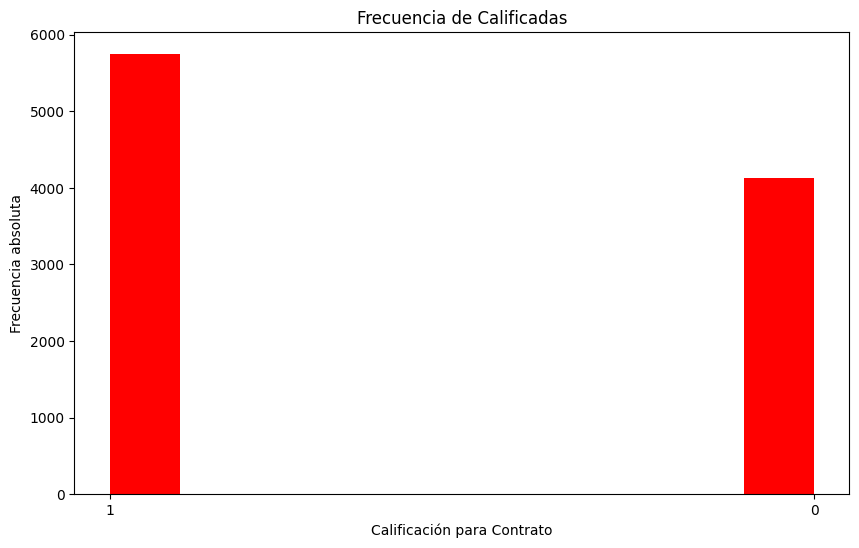

In [ ]:
#@title Frecuencia de Calificadas en el dataset
fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(df_imdb_x.Calificada, color = 'red')
ax.set_title('Frecuencia de Calificadas')
ax.set_xlabel('Calificación para Contrato')
ax.set_ylabel('Frecuencia absoluta')
fig.show()

Obtenemos una calificación bastante pareja en cuanto a la cantidad de películas calificadas para realizar un contrato de éxito con Strawberry utilizados los criterios explicados anteriormente.

#**Visualizaciones de Análisis Exploratorio con Matplotlib y Seaborn**

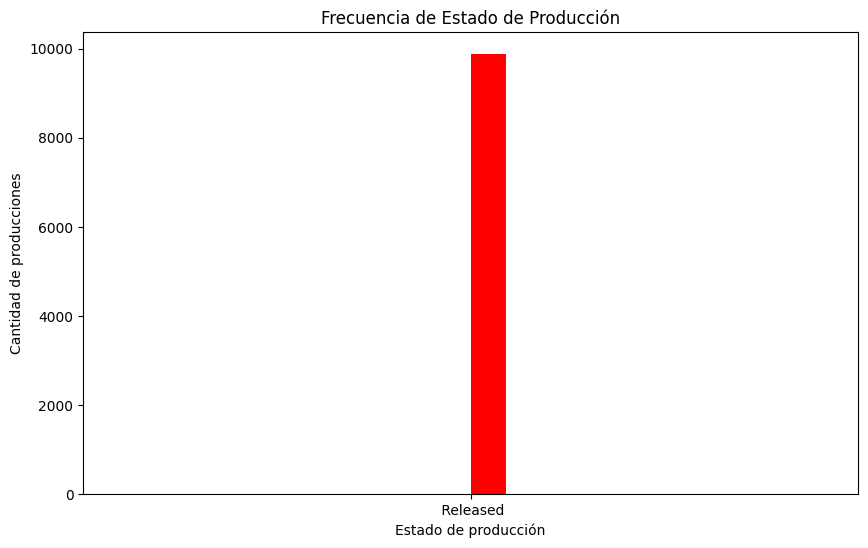

In [ ]:
#@title Histograma Matplotlib (1.1)
fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(df_imdb_x.status, bins = 20, color = 'red')
ax.set_title('Frecuencia de Estado de Producción')
ax.set_xlabel('Estado de producción')
ax.set_ylabel('Cantidad de producciones')
fig.show()

Realizamos un gráfico de frecuencias para apreciar que la mayoría (casi total) de películas en el dataset ya se encuentra lanzada al mercado, y muy pocas se encuentran aún en etapas finales de lanzamiento. Esto puede ser contraproducente para analizar algunos factores del dataset, sin embargo trataremos de utilizar sólo las producciones que se encuentren lanzadas al mercado para fines lógicos de análisis.

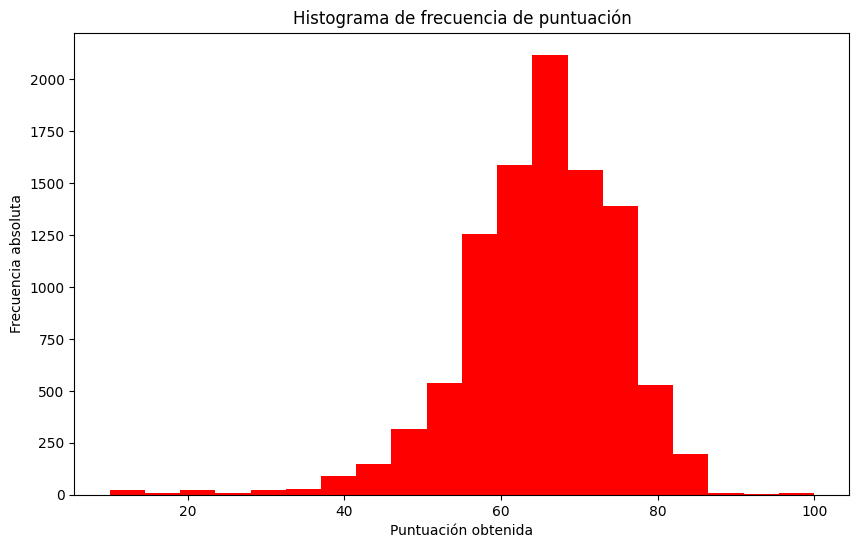

In [ ]:
#@title Histograma Matplotlib (1.2)
fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(df_imdb_x.score, bins = 20, color = 'red')
ax.set_title('Histograma de frecuencia de puntuación')
ax.set_xlabel('Puntuación obtenida')
ax.set_ylabel('Frecuencia absoluta')
fig.show()

Con el histograma podemos detallar que la mayoría de puntuaciones obtenidas por el total de películas ronda entre 60 y 75 puntos. Hay muy pocas películas que obtuvieron un valor muy bajo de puntuación, por lo que tomamos como criterio el 60 como mínimo aceptable para establecer un contrato.

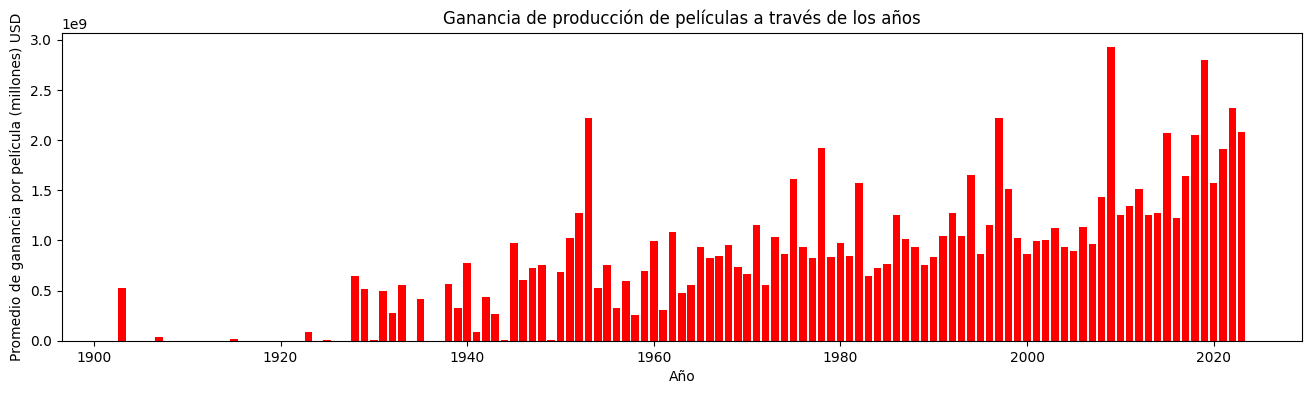

In [ ]:
#@title Barras Matplotlib (1.3)
fig, ax = plt.subplots(figsize = (16, 4))
ax.bar(df_imdb_x['Year'], df_imdb_x['revenue'], color = 'red')
ax.set_title('Ganancia de producción de películas a través de los años')
ax.set_xlabel('Año')
ax.set_ylabel('Promedio de ganancia por película (millones) USD')
fig.show()

Podemos apreciar que desde el año 1900 hasta el presente (2023) la ganancia por producción de películas no representa un cambio altamente significativo. Sin embargo se puede haber incrementado levemente por los avances tecnológicos y de efectos especiales. Podemos apreciar que este incremento empieza desde los años 1960 y se mantiene constante hasta llegar a la actualidad.

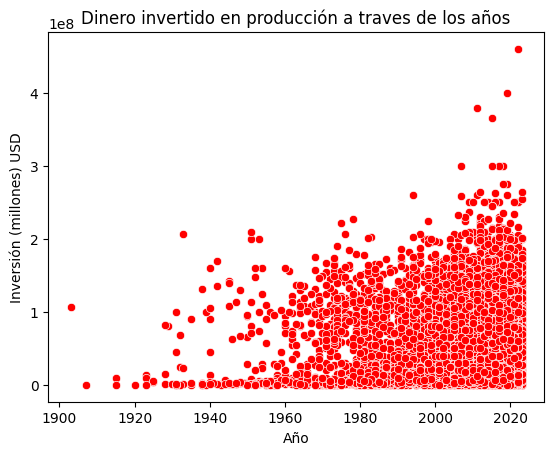

In [ ]:
#@title Puntos de Dispersión Seaborn (2.1)
ax = sns.scatterplot(data = df_imdb_x, x = 'Year', y = 'budget_x', color = 'red')
ax.set(xlabel = 'Año', ylabel = 'Inversión (millones) USD', title = 'Dinero invertido en producción a traves de los años')
fig.show()

Podemos observar que no hay mucha dispersión en cuanto a la inversión de producción para las películas a través de los años, ya que la mayoría de casos se mantiene entre menos del millón y 2 millones de dolares. Se observan algunos casos aislados actuales que realizan inversiones muy altas para la producción, pero ya son casos más actuales de producción, lo cual es entendible por el avance tecnológico.

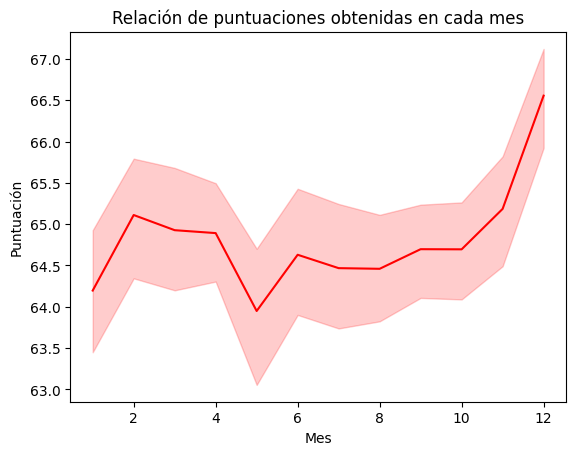

In [ ]:
#@title Gráfico de Línea Seaborn (2.2)
ax = sns.lineplot(data = df_imdb_x, x = 'Month', y = 'score', color = 'red')
ax.set(xlabel = 'Mes',ylabel = 'Puntuación', title = 'Relación de puntuaciones obtenidas en cada mes')
fig.show()

Podemos apreciar que la mayoría de películas estrenadas en el mes de Diciembre son las que mejor puntaje tienen, desde 1900 hasta 2023. Por lo tanto, podemos establecer como hipótesis que el momento del año, con los sentimientos y sensaciones de las fiestas, podría influir en como valoramos los productos o servicios que consumimos. También puede ser una estrategia adoptada por las empresas de producción (estrenar las mejores películas en las fechas de fiestas navideñas). Puede ser tomada como una respuesta a la pregunta 3 del abstracto, en donde puede ser un factor a tener en cuenta para futuros estrenos de la plataforma.

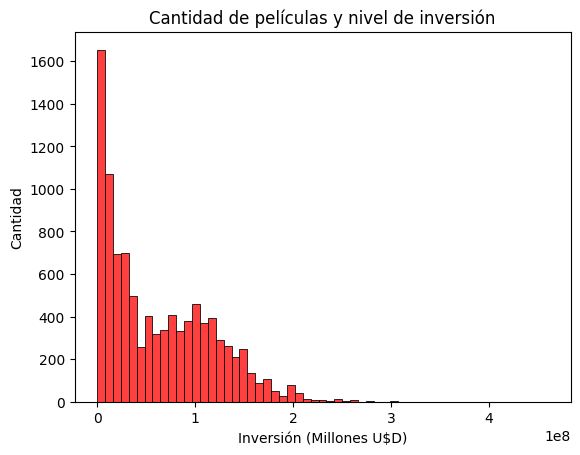

In [ ]:
#@title Histograma Seaborn (2.3)
ax = sns.histplot(data = df_imdb_x, x = 'budget_x', color = 'red')
ax.set(xlabel = 'Inversión (Millones U$D)', ylabel = 'Cantidad', title = 'Cantidad de películas y nivel de inversión')
fig.show()

Podemos observar que muchas películas tienen un nivel de inversión mucho menor al millón de dolares, lo cual puede ser rentable en cierta medida y dependiendo de los factores y herramientas de producción. Existe una gran cantidad de películas también con un nivel de inversión entre 0,5 y 1,5 millones. Son más bajos los casos donde la inversión es mayor a 1,5 millones.

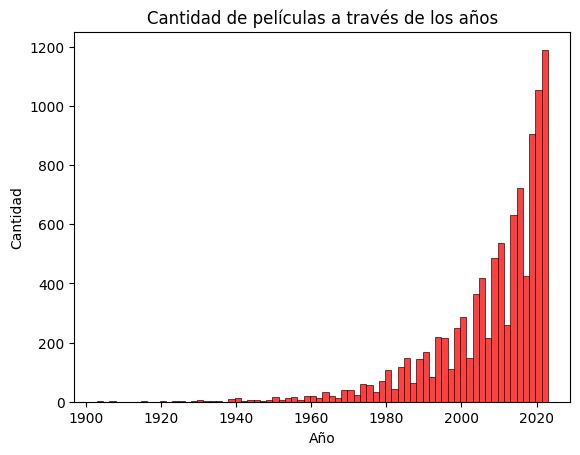

In [ ]:
#@title Gráfico Seaborn (2.4)
ax = sns.histplot(data = df_imdb_x, x = 'Year', color = 'red')
ax.set(xlabel = 'Año', ylabel = 'Cantidad', title = 'Cantidad de películas a través de los años')
fig.show()

Notamos que a través de los años la cantidad de películas lanzadas al mercado y comercializadas ha aumentado exponencialmente, siendo cada vez mas abierto el mercado y dando oportunidad a otras plataformas de entrar en la competencia.

#**Busqueda de Insights**

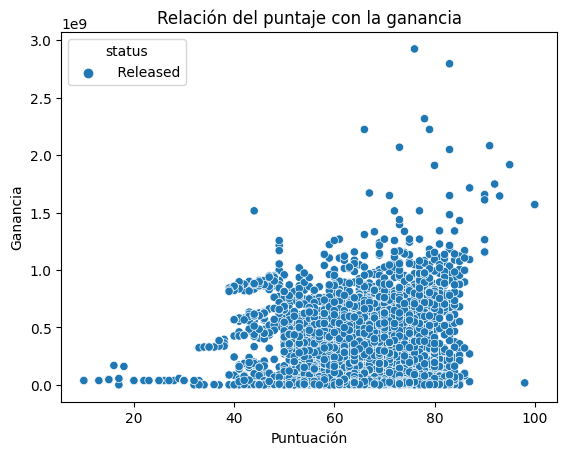

In [ ]:
#@title Relación del puntaje con la ganancia
ax = sns.scatterplot(data = df_imdb_x, x = 'score', y = 'revenue', hue = 'status')
ax.set(xlabel = 'Puntuación', ylabel = 'Ganancia', title = 'Relación del puntaje con la ganancia')
fig.show()

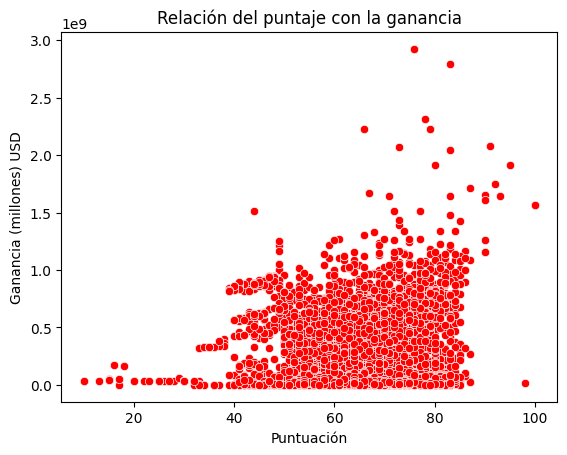

In [ ]:
ax = sns.scatterplot(data = df_imdb_x, x = 'score', y = 'revenue', color = 'red')
ax.set(xlabel = 'Puntuación', ylabel = 'Ganancia (millones) USD', title = 'Relación del puntaje con la ganancia')
fig.show()

Apreciamos que si bien hay variedad en la ganancia de cada producción, ésta no siempre acompaña al puntaje. Entendemos que hoy día las producciones pueden o no tener éxito dependiendo de otros factores externos a la propia producción (publicidad, popularidad del protagonista, inclusión, época de fiestas o vacaciones, etc) y que esos factores pueden pesar mucho más que la tecnología empleada o el dinero invertido. Los espectadores quieren consumir multimedias creativas y que estén en la boca de cada amigo o conocido, sin importar el dinero invertido o generado en ella.

Notamos que la relación entre ambas variables es muy baja, ya que existen una cantidad enorme, con gran densidad, de películas valoradas entre 40 y 85 puntos donde la ganancia no supera el millón de dolares y varia entre cada una por otros factores. Sin embargo, observamos que hay pocos casos (outliers) donde la valoración siempre fue arriba de 60 de score con ganancias mayores al millón de dolares.

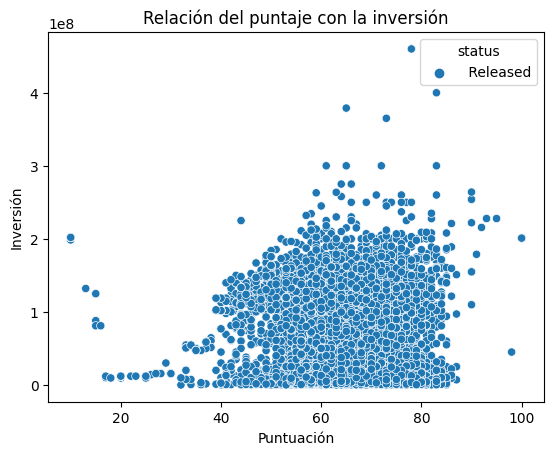

In [ ]:
#@title Relación de puntaje con la inversión inicial
ax = sns.scatterplot(data = df_imdb_x, x = 'score', y = 'budget_x', hue = 'status', color = 'red')
ax.set(xlabel = 'Puntuación', ylabel = 'Inversión', title = 'Relación del puntaje con la inversión')
fig.show()

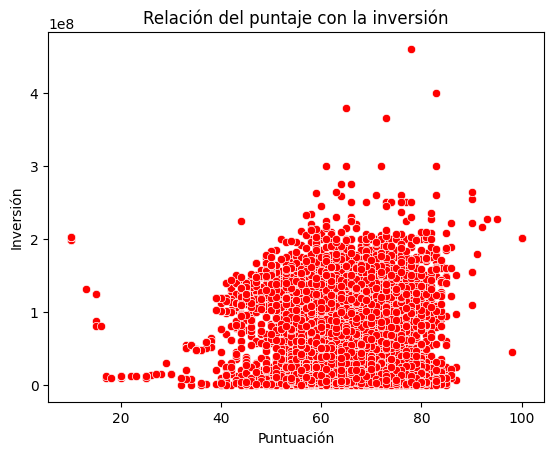

In [ ]:
ax = sns.scatterplot(data = df_imdb_x, x = 'score', y = 'budget_x', color = 'red')
ax.set(xlabel = 'Puntuación', ylabel = 'Inversión', title = 'Relación del puntaje con la inversión')
fig.show()

Tal como apreciamos en el gráfico anterior, no se aprecia una buena relación entre ambas variables. Por contrario, se nota también una aglomeración de producciones que se mantienen en una media de 40-85 de puntaje y un rango muy amplio en cuanto a la inversión inicial de cada producción. Deben existir otros factores que estén atados fuertemente al puntaje. Sin embargo no es el caso de la inversión inicial ni la ganancia generada. Ya que en ambos gráficos se aprecia una media muy concentrada en tener éxito pero sin preocupación aparente en buscar el 100 en puntajes.

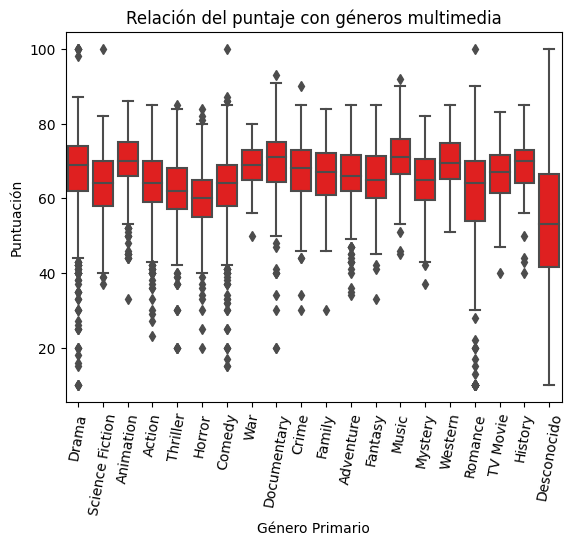

In [ ]:
#@title Relación del puntaje con géneros de películas
ax = sns.boxplot(data = df_imdb_x, x = 'primary_genre', y = 'score', color = 'red')
ax.set(xlabel= 'Género Primario', ylabel = 'Puntuación', title = 'Relación del puntaje con géneros multimedia')
plt.xticks(rotation = 80)
plt.show()

Podemos entender a partir del diagrama de cajas que todos los géneros mantienen una media mas cerrada en cuanto al puntaje. Podemos apreciar que hay muchos outliers en cada género, sobre todo en producciones de Drama. Las películas de Romance son las que poseen mas amplitud en cuanto al puntaje (30-90). Observamos que la mayoría de géneros tienen una amplitud muy similar entre ellas mismas (exceptuando el género identificado como "Desconocido").

#**Conclusión**

Entendemos que estos factores mencionados anteriormente (ganancia, inversión y género) no afectan de manera importante al puntaje obtenido de las producciones. Si bien pueden existir casos o exclusiones a la regla, o a la media de los rodajes, es importante entender también que hay otros factores más importantes que influyen en la apreciación de las películas y la valoración que cada espectador elige. En el gráfico 2.2 encontramos que el mes en que se estrenan puede estar fuertemente relacionado con la disposición de la evaluación de los espectadores. Sería de suma importancia también indagar, junto con métodos de predicción, y quizas otras bases de datos, demostrar la importancia de otros factores que no se tienen en cuenta al momento de puntuar una película (vacaciones, feriados, género, idioma, etc).

Si bien han sido respondidas las preguntas secundarias iniciales, aún se debe seguir indagando con futuros proyectos los factores que pueden influir directa o indirectamente en el score final obtenido por cada producción. Se solicitarán datasets con mayor información que la presentada hasta el momento para ampliar el proyecto a futuro.

#**Analisis Previo a los Modelos**

In [ ]:
#@title Visualización del dataset modificado y limpio
df_imdb_x.head()

,names,date_x,score,genre,overview,orig_title,status,orig_lang,budget_x,revenue,country,primary_genre,primary_crew,Month,Year,Calificada,budget
0,Creed III,2023-03-02,73,"Drama, Action","After dominating the boxing world, Adonis Cree...",Creed III,Released,English,75000000.0,2.716167e+08,AU,Drama,Michael B. Jordan,3,2023,1,0.177276
1,Avatar: The Way of Water,2022-12-15,78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,Science Fiction,Sam Worthington,12,2022,1,6.923041
2,The Super Mario Bros. Movie,2023-04-05,76,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,Animation,Chris Pratt,4,2023,1,0.615312
3,Mummies,2023-01-05,70,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,Animation,Óscar Barberán,1,2023,1,-0.921321
4,Supercell,2023-03-17,61,Action,Good-hearted teenager William always lived in ...,Supercell,Released,English,77000000.0,3.409420e+08,US,Action,Skeet Ulrich,3,2023,1,0.212319


Observamos como queda el dataset constituido luego de todas las transformaciones y analisis para posteriormente realizar los modelos de predicción.

In [ ]:
#@title Visualizamos la información general del dataset modificado y limpio
df_imdb_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9878 entries, 0 to 10177
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   names          9878 non-null   object        
 1   date_x         9878 non-null   datetime64[ns]
 2   score          9878 non-null   int64         
 3   genre          9878 non-null   object        
 4   overview       9878 non-null   object        
 5   orig_title     9878 non-null   object        
 6   status         9878 non-null   object        
 7   orig_lang      9878 non-null   object        
 8   budget_x       9878 non-null   float64       
 9   revenue        9878 non-null   float64       
 10  country        9878 non-null   object        
 11  primary_genre  9878 non-null   object        
 12  primary_crew   9878 non-null   object        
 13  Month          9878 non-null   int64         
 14  Year           9878 non-null   int64         
 15  Calificada     9878 

No existen nulos ni duplicados en ninguna de las variables y se encuentran con el tipo de dato correcto o adecuado, por lo que podemos empezar a utilizarlas para los análisis.

In [ ]:
#@title División de datos en categóricos y numéricos
num_cls = [x for x in df_imdb_x.columns if df_imdb_x[x].dtype != 'object']
cat_cls = [x for x in df_imdb_x.columns if x not in num_cls]

print(f'Numerical columns \n',num_cls)
print(f'Categorical columns \n',cat_cls)

Numerical columns 
 ['date_x', 'score', 'budget_x', 'revenue', 'Month', 'Year', 'budget']
Categorical columns 
 ['names', 'genre', 'overview', 'orig_title', 'status', 'orig_lang', 'country', 'primary_genre', 'primary_crew', 'Calificada']


Analizaremos y dividiremos (solo para terminos descriptivos y de analisis) las variables en categóricas y numéricas y las analizaremos por separado para ver si está en estado optimo para analizar.

In [ ]:
#@title Descripción general de los datos numéricos
df_imdb_x[num_cls].describe()

,score,budget_x,revenue,Month,Year,budget
count,9878.000000,9.878000e+03,9.878000e+03,9878.000000,9878.000000,9878.000000
mean,64.849970,6.270807e+07,2.572686e+08,6.683742,2007.664305,-0.038097
std,9.997133,5.429737e+07,2.805109e+08,3.537817,15.317341,0.951370
min,10.000000,2.000000e+03,7.000000e+00,1.000000,1903.000000,-1.136800
25%,60.000000,1.480500e+07,2.912168e+07,3.000000,2001.000000,-0.877429
50%,66.000000,5.000000e+07,1.500000e+08,7.000000,2012.000000,-0.260761
75%,72.000000,1.023000e+08,4.282831e+08,10.000000,2019.000000,0.655612
max,100.000000,4.600000e+08,2.923706e+09,12.000000,2023.000000,6.923041


Podemos ver que las variables Month y Year se utilizan para conocer la referencia del Mes o Año en que es producida una película, lo cual conviene tener como variable numérica para los análisis pero en estos casos descriptivos podemos desestimar dichos campos para Month y Year.

In [ ]:
#@title Matriz de Correlación
correlacion = df_imdb_x.corr()
correlacion.style.background_gradient (cmap = 'coolwarm')

<ipython-input-295-13ccbb43c412>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df_imdb_x.corr()


,score,budget_x,revenue,Month,Year,budget
score,1.000000,-0.042055,0.086532,0.031673,-0.091726,-0.042055
budget_x,-0.042055,1.000000,0.731637,0.013530,0.219099,1.000000
revenue,0.086532,0.731637,1.000000,0.017993,0.160880,0.731637
Month,0.031673,0.013530,0.017993,1.000000,-0.035666,0.013530
Year,-0.091726,0.219099,0.160880,-0.035666,1.000000,0.219099
budget,-0.042055,1.000000,0.731637,0.013530,0.219099,1.000000


Como resultado, obtenemos que la correlación entre las variables numéricas no es muy fuerte entre sí. Sin embargo, la única relación lineal fuerte que podemos verificar es la de la ganancia (revenue) y la inversión (budget_x y budget).

In [ ]:
#@title Visualizamos una lista de conteo de aparición de cada variable categórica
for i in cat_cls:
  print('-'*70)
  print(df_imdb_x[i].value_counts())

Apreciamos que cada variable categórica tiene muchos datos para encodearlos de forma numérica, por lo que los utilizaremos de la forma en que se presentan luego del Feature Engineering (excepto la variable status, pero no es representativa de los datos y no trae relevancia para el analisis actual).

#**Feature Selection**

In [ ]:
#@title Importamos librerias de Sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from joblib import dump

Traemos todas las librerias que vamos a necesitar de sklearn y scipy para realizar todo el proceso predictivo.

In [ ]:
#@title Definimos a X y a Y
x = df_imdb_x[['budget', 'genre', 'primary_crew', 'country']]
y = df_imdb_x['Calificada']

Entendemos que las variables para realizar la predicción (x) tienen que ser variables que tengan contexto para la variabilidad de y. Por lo que vamos a elegir variables que podemos conocer antes de que una producción se estrene en alguna plataforma. Esas serian budget (la variable budget_x estandarizada), el género de la película, el actor principal y el país donde fue realizada. Ya que datos como fecha de estreno, score y ganancia no se podría conocer antes de ser estrenada.

La variable Y, tendría que ser de carácter binario, donde nos indique si esa producción rinde los factores de calidad necesarios para la empresa y que se pueda llevar a cabo el contrato o al menos darle mayor valor a la hora de negociar. La variable 'Calificada' cumple con este criterio.

In [ ]:
#@title Realizamos un Get Dummies para organizar mejor la estructura a entrenar con el modelo
x_new = pd.get_dummies(x)

Realizamos un Get Dummies a nuestro X designado para mejor análisis predictivo y mejores resultados.

#**Modelo de Aprendizaje**

In [ ]:
#@title Preparación de datos para entrenar o ajustar
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3, random_state = 123)

Dividimos nuestros datos en 70% para el grupo de entrenamiento y 30% para el grupo de testeo.

In [ ]:
#@title Lista de modelos de clasificación de diferente tipo
seed = 123
model1 = LogisticRegression(max_iter = 300) #Algoritmo de clasificación lineal
model2 = SGDClassifier(random_state = seed) #Algoritmo de clasificación lineal
model3 = DecisionTreeClassifier(random_state = seed) #Algoritmo de arbol de decisión
model4 = RandomForestClassifier(random_state = seed) #Algoritmo de ensamblado
model5 = GradientBoostingClassifier(random_state = seed) #Algoritmo de ensamblado

Utilizamos diferentes tipos de algoritmos de clasificación para ver como pueden reaccionar cada uno con nuestros datos teniendo en cuenta el scoring seleccionado.

In [ ]:
#@title Evaluación de modelos
models = [model1, model2, model3, model4, model5] # Decretamos una lista que contenga todos los algoritmos que deseamos evaluar, designados en el código anterior

for m in range(len(models)): # Evaluamos modelo por modelo eligiendo el scoring de accuracy para compararlos
    model = models[m]
    scores = cross_val_score(model, x_new, y, scoring = 'f1_weighted', cv = 5)
    print(f"Valor F1 del modelo {m+1} - {np.mean(scores)}") # Mostramos cada accuracy de cada modelo para compararlos y elegir los que mas se adaptan al proyecto

Valor F1 del modelo 1 - 0.572647933669769
Valor F1 del modelo 2 - 0.5708580204666956
Valor F1 del modelo 3 - 0.6541992440196621
Valor F1 del modelo 4 - 0.6614380392405558
Valor F1 del modelo 5 - 0.6540434910827805


Vamos a utilizar como principal scoring de evaluación el F1 de los modelos. Con estos resultados vamos a tomar como los mejores modelos al Random Forest Classifier (modelo de ensamblado), con un F1 de 0,6614, y al Decision Tree Classifier (modelo de arbol de decisión), con un F1 de 0,6542, ya que ambos son diferentes en la forma de tomar las predicciones.

#**Predicción con Random Forest (sin mejora)**

In [ ]:
#@title Designamos al algoritmo y entrenamos los datos utilizando el Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#@title Predecimos los datos utilizando el Random Forest Classifier
y_pred1 = rf.predict(x_test)

In [ ]:
#@title Mostramos las métricas de la predicción base con Random Forest Classifier
print('El F1 es', f1_score(y_test, y_pred1, pos_label="1"))
print('El Accuracy es', accuracy_score(y_test, y_pred1))
print('El Roc Auc es', roc_auc_score(y_test, y_pred1))

El F1 es 0.7321041214750542
El Accuracy es 0.6666666666666666
El Roc Auc es 0.6445394589760787


Obteniendo estas métricas vamos a tomar como principal a la F1 ya que esta métrica combina la precisión (proporción de verdaderos positivos) y el recall (ratio de verdaderos positivos) y nos da un valor más objetivo. F1 será la que utilizaremos para evaluar el mejor modelo de predicción y compararlo con los otros resultados luego de mejorarlos.

En este caso al obtener un F1 de 0,722776 entendemos que esta tomando correctamente las predicciones pero podría mejorar cuando realicemos una mejora con hiperparámetros.

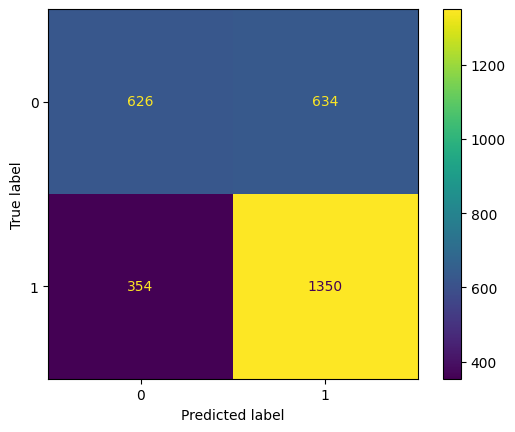

In [ ]:
#@title Matriz de Confusión con Random Forest Classifier
cm1 = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(confusion_matrix = cm1).plot();

Apreciamos que hay gran cantidad de verdadedos positivos representando 1334, 632 verdaderos negativos, 628 falsos positivos y 370 falsos negativos. Tiene resultados aceptables pero con posibilidad de mejora.

#**Predicción con Decision Tree Classifier (sin mejora)**

In [ ]:
#@title Designamos al algoritmo y entrenamos los datos utilizando el Decision Tree Classifier sin mejora
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#@title Predecimos los datos utilizando el Decision Tree Classifier
y_pred2 = dtc.predict(x_test)

In [ ]:
#@title Mostramos las métricas de la predicción base con Decision Tree Classifier
print('El F1 es', f1_score(y_test, y_pred2, pos_label="1"))
print('El Accuracy es', accuracy_score(y_test, y_pred2))
print('El Roc Auc es', roc_auc_score(y_test, y_pred2))

El F1 es 0.7166904422253922
El Accuracy es 0.6649797570850202
El Roc Auc es 0.6522747596691258


Utilizando el Decision Tree Classifier podemos notar una leve mejora en las métricas de Accuracy y Roc Auc en comparación con el Random Forest Classifier. Sin embargo, aunque el F1 tiene un valor levemente mas bajo, parece ser el modelo más equilibrado para realizar las predicciones.

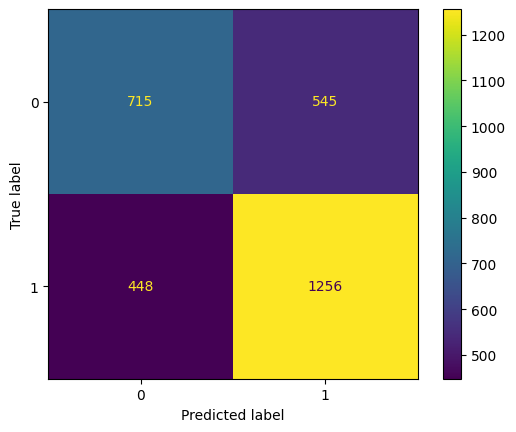

In [ ]:
#@title Matriz de Confusión con Decision Tree Classifier
cm2 = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(confusion_matrix = cm2).plot();

Apreciamos que hay gran cantidad de verdadedos positivos representando 1269, 705 verdaderos negativos, 555 falsos positivos y 435 falsos negativos. Tiene resultados aceptables pero con posibilidad de mejora. Comparado con la matriz del modelo con Random Forest Classifier, aunque tiene menos casos verdaderos positivos está mejor balanceado en cuando a los falsos positivos y negativos en general.

#**Análisis de los datos de entrenamiento y testeo**

In [ ]:
#@title Accuracy de datos con modelo base con Random Forest Classifier
print (f'Train Accuracy - : {rf.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf.score(x_test,y_test):.3f}')

Train Accuracy - : 0.999
Test Accuracy - : 0.667


In [ ]:
#@title Accuracy de datos con modelo base con Decision Tree Classifier
print (f'Train Accuracy - : {dtc.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {dtc.score(x_test,y_test):.3f}')

Train Accuracy - : 0.999
Test Accuracy - : 0.665


Para ambos modelos los datos de entrenamiento estan arrojando una score de 0,999 por lo que podemos concluir que los datos, aunque hayan sido limpiados y procesados podrían estar experimentando overfiting. Sin embargo se tomaron medidas para disminuir los outliers y estandarización de valores numéricos y aún así podria existir el overfiting.

#**Mejora de hiperparámetros con RandomizedSearchCV y Random Forest Classifier**

In [ ]:
#@title RandomizedSearchCV con Random Forest Classifier para buscar los mejores hiperparámetros para la mejor predicción

parametros1 = {'n_estimators': randint(50,500),'max_depth': randint(1,50)} # Designamos los parámetros con rangos utilizando el randint, para ambos hiperparámetros

rscv1 = RandomizedSearchCV(rf, param_distributions = parametros1, n_iter = 5, cv = 5) # Instanciamos el RandomizedSearchCV para utilizarlo con validación K fold por defecto, iterando 5 folds

rscv1.fit(x_train, y_train) # Enviamos a entrenar el conjunto con los datos separados de train

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcb013505b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcb012bbeb0>})

In [ ]:
#@title Visualizamos el mejor resultado de hiperparámetros del Random Forest Classifier
rf_best = rscv1.best_estimator_
print(rf_best)

RandomForestClassifier(max_depth=49, n_estimators=52)


In [ ]:
#@title Predecimos con los mejores hiperparámetros del Random Forest Classifier
y_pred_cv1 = rscv1.predict(x_test)

In [ ]:
#@title Mostramos las métricas de la predicción mejorada con Random Forest Classifier
print('El F1 es', f1_score(y_test, y_pred_cv1, pos_label="1"))
print('El Accuracy es', accuracy_score(y_test, y_pred_cv1))
print('El Roc Auc es', roc_auc_score(y_test, y_pred_cv1))

El F1 es 0.7277172705045566
El Accuracy es 0.5867071524966262
El Roc Auc es 0.5208165660630449


El modelo presenta muy poca mejoría de la métrica F1, pero para el Accuracy y el Roc Auc no esta siendo representativo, ya que ambos valores descendieron significativamente. Tomaremos este modelo como rechazado para realizar la predicción (en tal caso, se utilizará el modelo estándar sin mejora). Seguramente realizando una matriz de confusión podamos entendender mejor como quedan las predicciones.

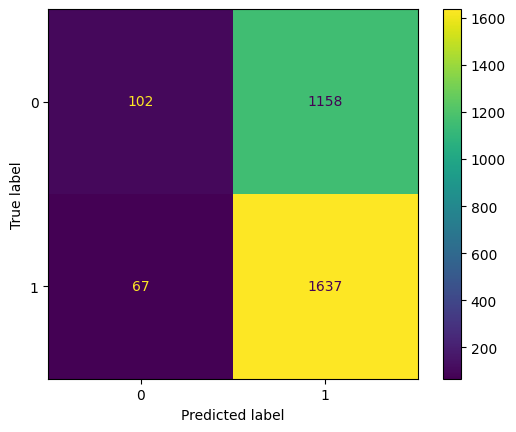

In [ ]:
#@title Matriz de Confusión para el modelo mejorado de Random Forest Classifier
cm3 = confusion_matrix(y_test, y_pred_cv1)
ConfusionMatrixDisplay(confusion_matrix = cm3).plot();

Apreciamos que hay gran cantidad de verdadedos positivos representando 1657, 77 verdaderos negativos, también gran cantidad de 1183 falsos positivos y 47 falsos negativos. Por lo que observamos, no esta tomando buenas predicciones en los casos negativos (ni verdaderos negativos ni falsos negativos), por lo que no sería adecuado tomar este modelo para el objetivo principal.

#**Mejora de hiperparámetros con RandomizedSearchCV y Decision Tree Classifier**

In [ ]:
#@title RandomizedSearchCV con Decision Tree Classifier para buscar los mejores hiperparámetros para la mejor predicción

parametros2 = {'max_depth': randint(1, 50), 'min_samples_leaf': (5, 100), 'criterion': ["gini", "entropy"]} # Designamos los parámetros con rangos utilizando el randint, para los dos primeros hiperparámetros

rscv2 = RandomizedSearchCV(dtc, param_distributions = parametros2, n_iter = 5, cv = 5) # Instanciamos el RandomizedSearchCV para utilizarlo con validación K fold por defecto, iterando 5 folds

rscv2.fit(x_train, y_train) # Enviamos a entrenar el conjunto con los datos separados de train

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcb0397a8f0>,
                                        'min_samples_leaf': (5, 100)})

In [ ]:
#@title Visualizamos el mejor resultado de hiperparámetros del Decision Tree Classifier
dtc_best = rscv2.best_estimator_
print(dtc_best)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=5)


In [ ]:
#@title Predecimos con los mejores hiperparámetros del Decision Tree Classifier
y_pred_cv2 = rscv2.predict(x_test)

In [ ]:
#@title Mostramos las métricas de la predicción mejorada con Decision Tree Classifier
print('El F1 es', f1_score(y_test, y_pred_cv2, pos_label="1"))
print('El Accuracy es', accuracy_score(y_test, y_pred_cv2))
print('El Roc Auc es', roc_auc_score(y_test, y_pred_cv2))

El F1 es 0.7070414372645609
El Accuracy es 0.6589068825910931
El Roc Auc es 0.6488542365302928


En este caso podemos notar que si mejora levemente el F1 comparado con cualquier otro modelo evaluado anteriormente, excepto con el Random Forest Classifier, el cual muestra los mejores valores y más equilibrados para lograr el objetivo principal planteado.

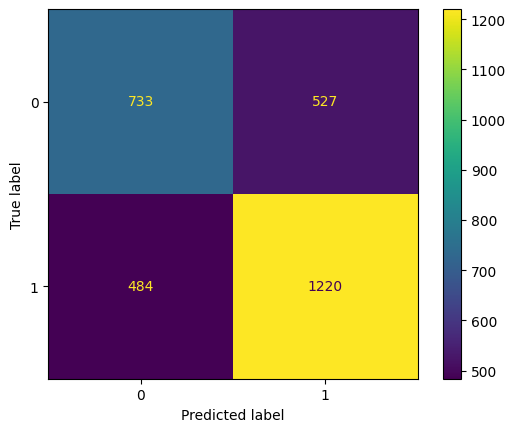

In [ ]:
#@title Matriz de Confusión para el modelo mejorado de Decision Tree Classifier
cm4 = confusion_matrix(y_test, y_pred_cv2)
ConfusionMatrixDisplay(confusion_matrix = cm4).plot();

Apreciamos que hay gran cantidad de verdadedos positivos representando 1353, 562 verdaderos negativos, 698 falsos positivos y 351 falsos negativos. Notamos que es una matriz de confusión muy parecida a la que realizamos con Random Forest Classifier. Ambos tienen valores muy equilibrados en cuando a los falsos positivos y falsos negativos y ambos representan muy bien a los valores verdaderos.

#**Conclusión Final**

Pudimos responder las interrogantes que planteamos al principio del proyecto utilizando herramientas de visualización que nos permitieron analizar los datos de una forma general hasta una forma más específica. Sin embargo, al haber llevado a cabo todos los análisis, es necesario solicitar una nueva instancia de evaluación con mejores datos y un dataset más representativo para la problemática, el cual debe ser solicitado al área de Data en cuanto sea posible, con nuevas variables que expliquen y representen el comportamiento entre la inversión y la ganancia, obviamente acompañando al resultado del score obtenido por la audiencia. Si bien se eligieron las variables más representativas para X en esta oportunidad, no fueron datos suficientemente relacionados como para que el modelo pudiese captar y aprender mejor los patrones que manejan los factores decisivos que permiten que una producción sea tomada en cuenta para un contrato exitoso con la empresa de Strawberry. Además se intentó manejar los datos de la forma más cuidadosa posible, realizando getdummies a los datos categóricos, aplicando estandarización de las variables numéricas a utilizar, disminuyendo la mayor cantidad de outliers posible sin que afectara los datos importantes de cada producción, se utilizaron mejoras de hiperparámetros para los modelos elegidos (de clasificación) y se llevo a cabo procesos de validación con K-fold dentro de las mejoras de modelo.

Tenemos una probabilidad de predicción acertada del 72% aproximadamente, lo cual no es un resultado óptimo, pero sí cumple con ciertos parámetros de los sectores importantes de la empresa para empezar a ser utilizado. Guardaremos el registro del modelo utilizado, pero probablemente no lo necesitemos a futuro con las mismas métricas y variables utilizadas, ya que necesitaremos complementar y respaldar mejor la data que nos pueda entregar el sector encargado con muchas otras variables destacables.

In [ ]:
#@title Guardamos el mejor modelo predictivo (Random Forest Classifier sin mejora)
dump(rf, 'randomforestclass.joblib')

['randomforestclass.joblib']